# Importing Libraries and loading the dataset

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r"Fish.csv")

# Printing the head

In [263]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Data Prep - Calculating Max/Mean/Min across species and flattening the same

In [264]:
data=df.groupby('Species').agg({"Weight": ["mean","min","max"]})
# rename columns
data.columns = ['weight_mean', 'weight_min', 'weight_max']
# reset index to get grouped columns back
data = data.reset_index()
data=data.sort_values(by=['weight_mean'], ascending=True)
print(data)

     Species  weight_mean  weight_min  weight_max
5      Smelt    11.178571         6.7        19.9
4      Roach   152.050000         0.0       390.0
1     Parkki   154.818182        55.0       300.0
2      Perch   382.239286         5.9      1100.0
6  Whitefish   531.000000       270.0      1000.0
0      Bream   617.828571       242.0      1000.0
3       Pike   718.705882       200.0      1650.0


# Line Chart

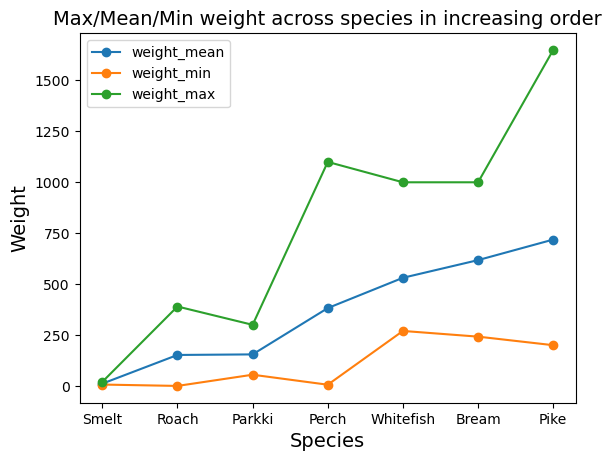

In [265]:
plt.plot(data['Species'], data['weight_mean'], label ='weight_mean', marker='o')
plt.plot(data['Species'], data['weight_min'], label ='weight_min', marker='o')
plt.plot(data['Species'], data['weight_max'], label ='weight_max', marker='o')

plt.title('Max/Mean/Min weight across species in increasing order', fontsize=14)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Weight', fontsize=14)
# plt.grid(True)
plt.legend()
plt.show()


# Bar Chart

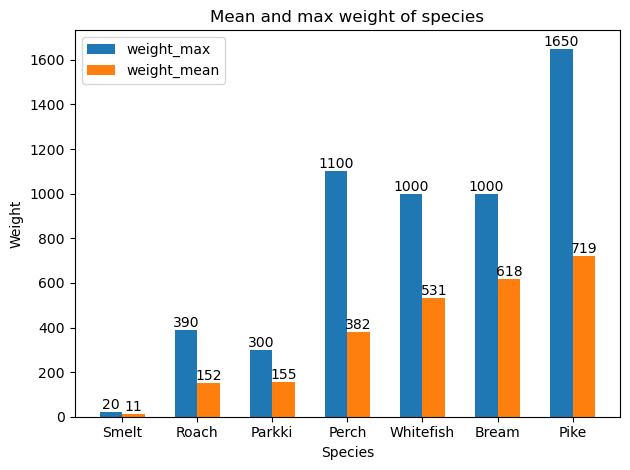

In [266]:

#data
#x-axis
#rounding off data so that text is not clumpsy
data['weight_mean']=data['weight_mean'].round(0)
data['weight_max']=data['weight_max'].round(0)

species = data['Species'].to_list()
#y-axis
mean_weight = data['weight_mean'].to_list()
max_weight = data['weight_max'].to_list()
 
#bar chart properties
x = np.arange(len(species))
width = 0.3
 
#draw grouped bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, max_weight, width, label='weight_max')
bar2 = ax.bar(x + width/2, mean_weight, width, label='weight_mean')
 
ax.set_xlabel('Species')
ax.set_ylabel('Weight')
ax.set_title('Mean and max weight of species')
ax.set_xticks(x, species)
ax.legend()
 
#setting bar labels
ax.bar_label(bar1)
ax.bar_label(bar2)
 
fig.tight_layout()
 
plt.show()

# Scatter plot

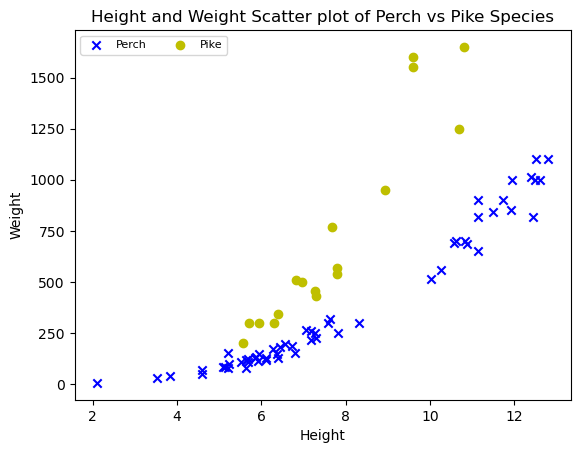

In [267]:
colors = ['b', 'y', 'm', 'r']
perch_data=df[df['Species']=='Perch']
pike_data=df[df['Species']=='Pike']

lo = plt.scatter(perch_data['Height'], perch_data['Weight'], marker='x', color=colors[0])
ll = plt.scatter(whitefish_data['Height'], pike_data['Weight'], marker='o', color=colors[1])

plt.title("Height and Weight Scatter plot of Perch vs Pike Species")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend((lo, ll),
           ('Perch', 'Pike'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)

plt.show()

# Box Plot

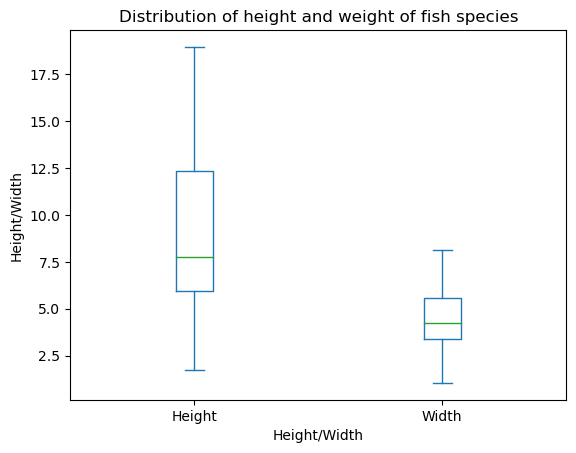

In [268]:
perch_data=df[df['Species']=='Perch']

ax = df[['Height', 'Width']].plot(kind='box', title='boxplot')
plt.title("Distribution of height and weight of fish species")
plt.xlabel("Height/Width")
plt.ylabel("Height/Width")
# show plot
plt.show()


# Pie Chart

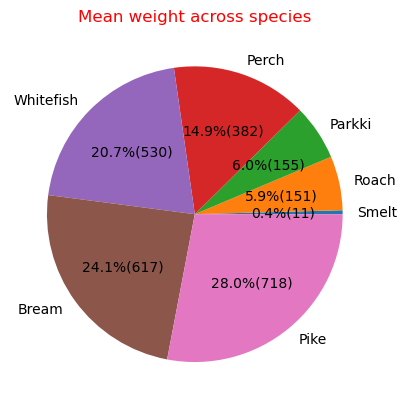

In [269]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%({:d})".format(pct, absolute)

spec= data['Species'].tolist()
plt.pie(mean_weight, labels = spec,autopct = lambda pct: func(pct, mean_weight))
plt.title('Mean weight across species', fontsize=12,color='red')

plt.show()

